In [33]:
import xarray as xr
import jsmetrics as js
from pathlib import Path

import functions.data_wrangling as data
import functions.eddy_feedback as ef

import warnings
warnings.filterwarnings("ignore", category=xr.SerializationWarning)

# Data setup

#### Set paths, find model names and import data

In [34]:
data_path = Path('/home/links/ct715/data_storage/PAMIP/processed_monthly/regridded_3x3')
pd_path = data_path / '1.1_pdSST-pdSIC' 
fut_path = data_path / '1.6_pdSST-futArcSIC' 

list_dir = fut_path.iterdir()
model_list = [item.name.split('_')[0] for item in list_dir]
model_list.sort()

In [35]:
model_list.remove('OpenIFS-159')
model_list.remove('OpenIFS-511')
model_list

['CESM1-WACCM-SC',
 'CESM2',
 'CNRM-CM6-1',
 'CanESM5',
 'EC-EARTH3',
 'FGOALS-f3-L',
 'HadGEM3-GC31-LL',
 'HadGEM3-GC31-MM',
 'IPSL-CM6A-LR',
 'MIROC6',
 'NorESM2-LM']

In [37]:
pd, fut = {}, {}
for model in model_list:
    # import present day datasets and take winter mean
    ds_pd = xr.open_mfdataset(
        str(pd_path / f'{model}*.nc'),
        parallel=True,
        engine='netcdf4'
    )
    pd[model] = data.seasonal_mean(ds_pd, season='djf')
    
    # import futArc datasets and take winter mean
    ds_fut = xr.open_mfdataset(
        str(fut_path / f'{model}*.nc'),
        parallel=True,
        engine='netcdf4'
    )
    fut[model] = data.seasonal_mean(ds_fut, season='djf')

### Import ua from raw files and add to current datasets

In [ ]:
raw_path = Path('/home/links/ct715/data_storage/PAMIP/monthly')
exp_names = ['1.1_pdSST-pdSIC','1.6_pdSST-futArcSIC']

pd_ua, fut_ua = {}, {}
for model in model_list:
    for exp in exp_names:
        
        raw_data_path = raw_path / f'{exp}/ua/{model}' 
        
        # First, import data (some aren't in this location)
        if model in ['CESM1-WACCM-SC', 'IPSL-CM6A-LR']:
            ds = xr.open_mfdataset(
                str(raw_data_path / '*.nc'),
                parallel=True
            )
        else:
            ds = xr.open_mfdataset(
                str(raw_data_path / '*.nc'),
                parallel=True,
                combine='nested',
                concat_dim='ens_ax'
            )
            
        # Second, extract ua (some are U)
        if 'ua' in ds.data_vars:
            print(f'{model} has ua')
        else:
            print(f'{model} has: {ds.data_vars}')
            
        if exp == exp_names[0]:
            pd_ua[model] = ds
        else:
            fut_ua[model] = ds

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [31]:
raw_path = Path('/home/links/ct715/data_storage/PAMIP/monthly/1.1_pdSST-pdSIC/ua')
ds = xr.open_mfdataset(
    str(raw_path / 'HadGEM3-GC31-LL/*.nc'),
    parallel=True,
    combine='nested',
    concat_dim='ens_ax'
)
ds

<xarray.Dataset>
Dimensions:      (longitude: 192, latitude: 144, hybrid_ht: 85, t: 14,
                  surface: 1, toa: 1, ht: 1, level275: 1, longitude_1: 192,
                  latitude_1: 145, level6: 4, msl: 1, longitude_2: 360,
                  latitude_2: 180, p_1: 19, ens_ax: 100)
Coordinates: (12/15)
  * longitude    (longitude) float32 0.9375 2.812 4.688 ... 355.3 357.2 359.1
  * latitude     (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * hybrid_ht    (hybrid_ht) float32 20.0 53.33 100.0 ... 7.91e+04 8.5e+04
  * t            (t) object 2000-04-16 00:00:00 ... 2001-05-16 00:00:00
  * surface      (surface) float32 0.0
  * toa          (toa) float32 0.0
    ...           ...
  * latitude_1   (latitude_1) float32 -90.0 -88.75 -87.5 ... 87.5 88.75 90.0
  * level6       (level6) float32 0.05 0.225 0.675 2.0
  * msl          (msl) float32 0.0
  * longitude_2  (longitude_2) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * latitude_2   (latitude_2) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * p_1          (p_1) float32 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
Dimensions without coordinates: ens_ax
Data variables: (12/58)
    theta        (ens_ax, t, hybrid_ht, latitude, longitude) float32 dask.array<chunksize=(1, 14, 85, 144, 192), meta=np.ndarray>
    temp         (ens_ax, t, surface, latitude, longitude) float32 dask.array<chunksize=(1, 14, 1, 144, 192), meta=np.ndarray>
    iceconc      (ens_ax, t, surface, latitude, longitude) float32 dask.array<chunksize=(1, 14, 1, 144, 192), meta=np.ndarray>
    icedepth     (ens_ax, t, surface, latitude, longitude) float32 dask.array<chunksize=(1, 14, 1, 144, 192), meta=np.ndarray>
    temp_1       (ens_ax, t, surface, latitude, longitude) float32 dask.array<chunksize=(1, 14, 1, 144, 192), meta=np.ndarray>
    temp_2       (ens_ax, t, surface, latitude, longitude) float32 dask.array<chunksize=(1, 14, 1, 144, 192), meta=np.ndarray>
    ...           ...
    field1903    (ens_ax, t, surface, latitude_2, longitude_2) float32 dask.array<chunksize=(1, 14, 1, 180, 360), meta=np.ndarray>
    field1901    (ens_ax, t, surface, latitude, longitude) float32 dask.array<chunksize=(1, 14, 1, 144, 192), meta=np.ndarray>
    u            (ens_ax, t, p_1, latitude_1, longitude_1) float32 dask.array<chunksize=(1, 14, 19, 145, 192), meta=np.ndarray>
    temp_4       (ens_ax, t, p_1, latitude_1, longitude_1) float32 dask.array<chunksize=(1, 14, 19, 145, 192), meta=np.ndarray>
    ht_1         (ens_ax, t, p_1, latitude_1, longitude_1) float32 dask.array<chunksize=(1, 14, 19, 145, 192), meta=np.ndarray>
    unspecified  (ens_ax, t, p_1, latitude_1, longitude_1) float32 dask.array<chunksize=(1, 14, 19, 145, 192), meta=np.ndarray>
Attributes:
    history:  Mon Nov 11 16:04:45 GMT 2019 - CONVSH V1.93 13-October-2015

In [32]:
raw_path = Path('/home/links/ct715/data_storage/PAMIP/monthly/1.1_pdSST-pdSIC/ua')
ds = xr.open_mfdataset(
    str(raw_path / 'HadGEM3-GC31-MM/*.nc'),
    parallel=True,
    combine='nested',
    concat_dim='ens_ax'
)
ds

<xarray.Dataset>
Dimensions:    (time: 14, ens_ax: 300, bnds: 2, plev: 19, lat: 325, lon: 432)
Coordinates:
  * time       (time) object 2000-04-16 00:00:00 ... 2001-05-16 00:00:00
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat        (lat) float64 -90.0 -89.44 -88.89 -88.33 ... 88.89 89.44 90.0
  * lon        (lon) float64 0.0 0.8333 1.667 2.5 ... 356.7 357.5 358.3 359.2
Dimensions without coordinates: ens_ax, bnds
Data variables:
    time_bnds  (ens_ax, time, bnds) object dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    lat_bnds   (ens_ax, time, lat, bnds) float64 dask.array<chunksize=(1, 1, 325, 2), meta=np.ndarray>
    lon_bnds   (ens_ax, time, lon, bnds) float64 dask.array<chunksize=(1, 1, 432, 2), meta=np.ndarray>
    ua         (ens_ax, time, plev, lat, lon) float32 dask.array<chunksize=(1, 1, 19, 325, 432), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            PAMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  54090.0
    creation_date:          2020-09-17T22:45:26Z
    ...                     ...
    tracking_id:            hdl:21.14100/94ec2da6-a427-45ec-bad7-33c875a9aa30
    variable_id:            ua
    variable_name:          ua
    variant_label:          r100i1p1f2
    license:                CMIP6 model data produced by Met Office Hadley Ce...
    cmor_version:           3.4.0

# Regional plots

In [19]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

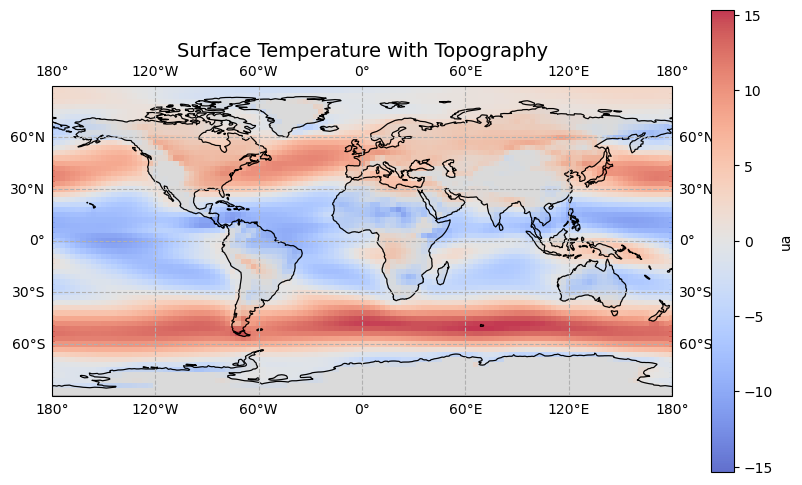

In [20]:
# Load dataset
ua850 = fut[model_list[6]]['ua'].sel(level=850).mean(('time', 'ens_ax'))

# Create the plot
fig, ax = plt.subplots(
    figsize=(10, 6),
    subplot_kw={'projection': ccrs.PlateCarree()}  # Use PlateCarree for lat/lon data
)

ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')  # Default land feature

# Overlay surface temperature
ua850.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',
    alpha=0.8,  # Transparency for blending
    add_colorbar=True
)

# Add gridlines and coastlines
ax.coastlines(resolution='110m', color='black', linewidth=0.8)
ax.gridlines(draw_labels=True, linestyle='--')

# Add a title
plt.title("Surface Temperature with Topography", fontsize=14)
plt.show()

### North Atlantic

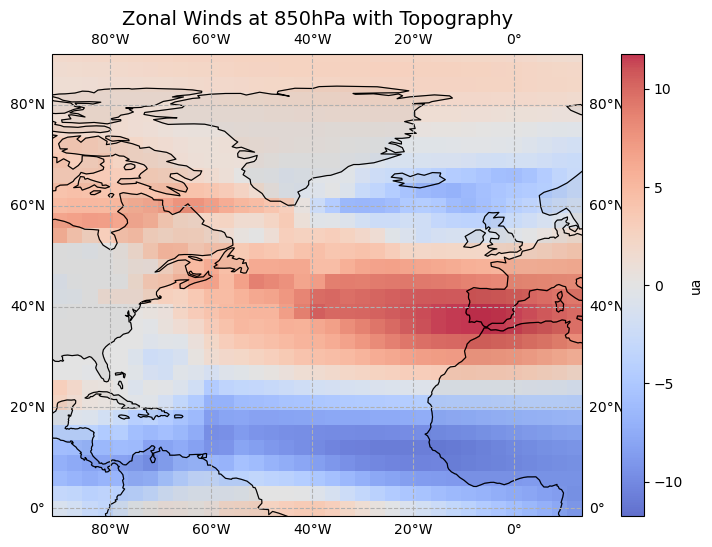

In [21]:
# Adjust longitudes to -180 to 180 range
ua850_lon = ua850.assign_coords(lon=ua850.lon - 180)
# Subset longitude for 280W-360W (-80 to 0) and 0E-12E
ua850_lon1 = ua850_lon.sel(lon=slice(-90,12)) 
ua850_natl = ua850_lon1.sel(lat=slice(0, 90))

# Create the plot
fig, ax = plt.subplots(
    figsize=(10, 6),
    subplot_kw={'projection': ccrs.PlateCarree()}  # Use PlateCarree for lat/lon data
)

ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')  # Default land feature

# Overlay zonal wind at 850hPa
ua850_natl.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',
    alpha=0.8,  # Transparency for blending
    add_colorbar=True
)

# Add gridlines and coastlines
ax.coastlines(resolution='110m', color='black', linewidth=0.8)
ax.gridlines(draw_labels=True, linestyle='--')

# Add a title
plt.title("Zonal Winds at 850hPa with Topography", fontsize=14)
plt.show()

### North Pacific

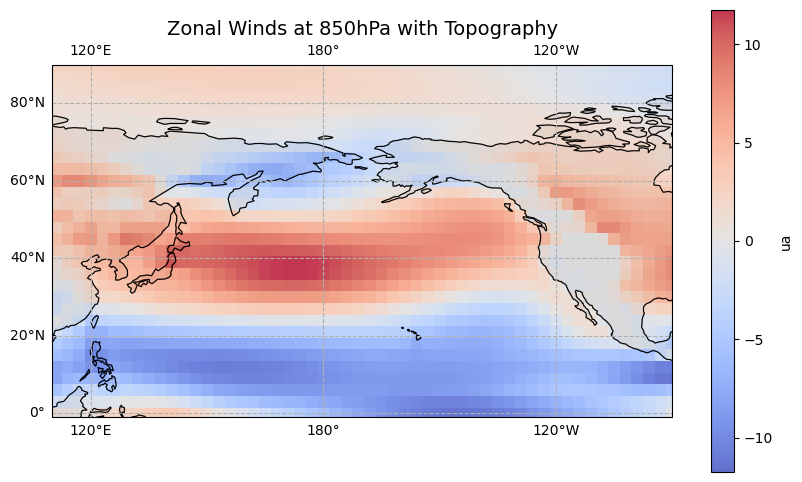

In [22]:
# define NH
ua850_npac = ua850.sel(lat=slice(-1, 90))
ua850_npac = ua850_npac.sel(lon=slice(110,270)) 


# Create the plot
fig, ax = plt.subplots(
    figsize=(10, 6),
    subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}  # Use PlateCarree for lat/lon data
)

ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')  # Default land feature

# Overlay zonal wind at 850hPa
ua850_npac.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',
    alpha=0.8,  # Transparency for blending
    add_colorbar=True
)

# Set the extent to avoid grey space
ax.set_extent([110, 270, -1, 90], crs=ccrs.PlateCarree())  # [lon_min, lon_max, lat_min, lat_max]

# Add gridlines and coastlines
ax.coastlines(resolution='110m', color='black', linewidth=0.8)
ax.gridlines(draw_labels=True, linestyle='--')

# Add a title
plt.title("Zonal Winds at 850hPa with Topography", fontsize=14)
plt.show()

# Jet shift calculations

## North Atlantic

In [23]:
# model-specific changes
fut[model_list[6]]['ubar'] = fut[model_list[6]].ua.mean('lon')
fut[model_list[6]] = fut[model_list[6]][['ubar', 'epfy', 'divF']]

jets_pd_natl, jets_fut_natl = {}, {}
for model in model_list:
    
    # rename vars for jsmetrics
    pd_model_natl = pd[model].rename({'level': 'plev', 'ubar': 'ua'})
    fut_model_natl = fut[model].rename({'level': 'plev', 'ubar': 'ua'})
    
    # one model ensemble members is done by time rather than ens_ax
    if 'ens_ax' in pd_model_natl.dims:
        pd_model_natl = pd_model_natl.mean('ens_ax')
        fut_model_natl = fut_model_natl.mean('ens_ax')
    else:
        pd_model_natl = pd_model_natl.groupby('time.month').mean('time')
        pd_model_natl = pd_model_natl.rename({'month': 'time'})
        fut_model_natl = fut_model_natl.groupby('time.month').mean('time')
        fut_model_natl = fut_model_natl.rename({'month': 'time'})
        
    # subset data to consistency 
    pd_model_natl, fut_model_natl = pd_model_natl.sel(plev=850.), fut_model_natl.sel(plev=850.)
    pd_model_natl, fut_model_natl = pd_model_natl.sel(lat=slice(30,70)), fut_model_natl.sel(lat=slice(30,70))
    
    # subset datasets for north atlantic region
    pd_model_natl = pd_model_natl.assign_coords(lon=pd_model_natl.lon - 180)
    fut_model_natl = fut_model_natl.assign_coords(lon=fut_model_natl.lon - 180)
    pd_model_natl, fut_model_natl = pd_model_natl.sel(lon=slice(-90,12)), fut_model_natl.sel(lon=slice(-90,12))
        
    # Add the longitude coordinate
    lon = xr.DataArray([0], dims="lon", coords={"lon": [0]})
    pd_model_natl = xr.concat([pd_model_natl], dim=lon)
    pd_model_natl = js.jet_statistics.zappa_et_al_2018(pd_model_natl, lon_resolution=3)
    fut_model_natl = xr.concat([fut_model_natl], dim=lon)
    fut_model_natl = js.jet_statistics.zappa_et_al_2018(fut_model_natl, lon_resolution=3)
    
    # pd_model_natl = convert_to_360_day_calendar(pd_model_natl)
    
    jets_pd_natl[model] = pd_model_natl
    jets_fut_natl[model] = fut_model_natl

KeyError: "no index found for coordinate 'lon'"

In [9]:
diff = {}
for model in model_list:
    
    # take diffference of jet latitudes
    difference = jets_fut[model].jet_lat - jets_pd[model].jet_lat
    diff[model] = difference.values

### Calculate EFP

In [10]:
efp_pd, efp_fut = {}, {}
for model in model_list:
    
    efp_value_pd = ef.calculate_efp(pd[model], data_type='pamip')
    efp_value_fut = ef.calculate_efp(fut[model], data_type='pamip')
    
    efp_pd[model] = efp_value_pd
    efp_fut[model] = efp_value_fut

### Plot the data

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy as sp

In [ ]:
jet_shifts = pd.DataFrame.from_dict(diff, orient='index', columns=['jet_shift']).reset_index()
jet_shifts.rename(columns={'index': 'model'}, inplace=True)
# Add the dictionary as a new column
jet_shifts['efp_value'] = jet_shifts.model.map(efp_pd)
jet_shifts

,model,jet_shift,efp_value
0,CESM1-WACCM-SC,-0.429985,0.1421
1,CESM2,-0.847677,0.4132
2,CNRM-CM6-1,-0.678367,0.2771
3,CanESM5,-0.684242,0.4446
4,EC-EARTH3,-0.553187,0.3467
5,FGOALS-f3-L,-0.393855,0.2642
6,HadGEM3-GC31-LL,-0.529637,0.3168
7,HadGEM3-GC31-MM,-0.767813,0.3757
8,IPSL-CM6A-LR,-0.264936,0.3046
9,MIROC6,-0.557504,0.2565


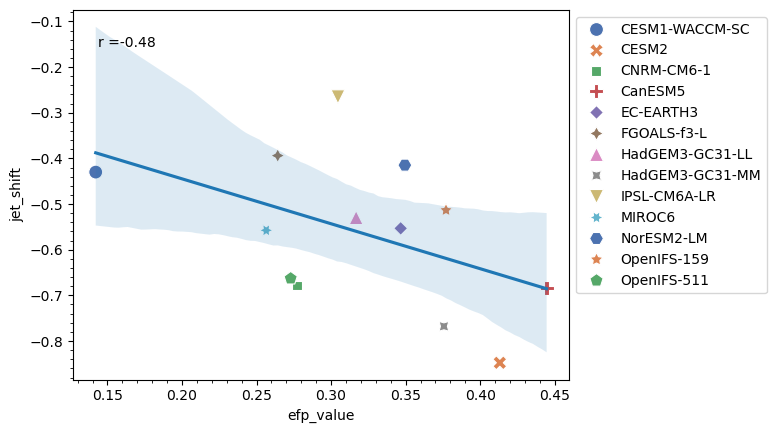

In [ ]:
plt.figure()
# sns.regplot(data=jet_shifts, x='efp_value', y='jet_shift', scatter_kws={'color': 'white'}, line_kws={"color": "gray"})
scatter_plot = sns.scatterplot(
    x='efp_value', 
    y='jet_shift', 
    hue='model', 
    style='model', 
    data=jet_shifts, 
    palette='deep', 
    markers=True, 
    s=100
)

# Plot the regression line
sns.regplot(
    x='efp_value', 
    y='jet_shift', 
    data=jet_shifts, 
    scatter=False, 
    ax=scatter_plot
)

# Insert Pearson's correlation
r, p = sp.stats.pearsonr(x=jet_shifts['efp_value'], y=jet_shifts['jet_shift'])
ax = plt.gca()
plt.text(.05, .9, "r ={:.2f}".format(r), transform=ax.transAxes)

# plt.xlim([0,0.5])
# plt.ylim([0,0.5])

plt.minorticks_on()
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## North Pacific